<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Metricas_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Campañas de marketing directo de una institución bancaria. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna de destino se llama 'y_yes' en este csv).

Tu tarea es construir un modelo de regresión logística para predecir si un cliente se suscribirá o no. Ajusta los hiperparámetros para obtener el mejor modelo posible. Luego, calcula las siguientes métricas de clasificación:

Métricas para calcular:
**Precisión**,
Sensibilidad,
Especificidad,
AUC ROC,
Además, grafica la República de China.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/bank_modified.csv')

In [4]:
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

# Regresion logistica

Text(0.5, 1.0, 'Logistic regresion')

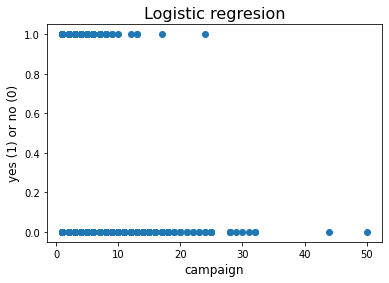

In [11]:
plt.scatter(df['campaign'], df['y_yes'])
plt.ylabel('yes (1) or no (0)', fontsize = 12)
plt.xlabel('campaign', fontsize = 12)
plt.title('Logistic regresion', fontsize = 16)

In [12]:
X = df[['campaign']]
y = df['y_yes']

In [13]:
# Crea una instancia del modelo
logreg = LogisticRegression(C = 1000)
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Se ajusta solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar la transformación tanto al conjunto de entrenamiento como al conjunto de prueba.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [14]:
# Este código es solo para trazar/visualizar las predicciones
df1 = pd.DataFrame(data = {'campaign': X_test.flatten(),
                     'y_yes': y_test})
df1['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
df2 =df1.sort_values(['logistic_preds'])


Text(0.5, 0, 'campaign')

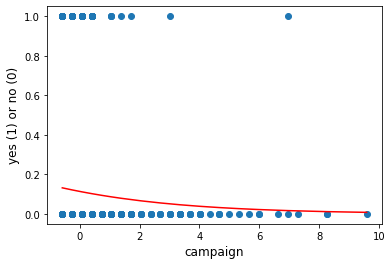

In [15]:
##### No se ajusta
plt.scatter(df1['campaign'], df1['y_yes'])
plt.plot(df2['campaign'], df2['logistic_preds'].values, color='red')
plt.ylabel('yes (1) or no (0)', fontsize = 12)
plt.xlabel('campaign', fontsize = 12)


In [16]:
logreg.score(X_test,y_test)

0.887709991158267

In [17]:
df1['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
df2 =df1.sort_values(['logistic_preds'])
df1.sort_values(['y_yes'],inplace=True)

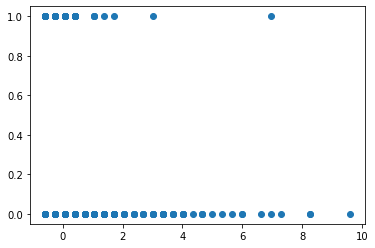

In [18]:
plt.scatter(df1['campaign'], df1['y_yes'])

In [19]:
logreg.score(X_test,y_test)

0.887709991158267

#  programación One versus all

In [20]:
# Imprimir cuántas clases
print('y_yes', np.unique(df['y_yes']))

y_yes [0 1]


In [21]:
# Las clases no están equilibradas
df['y_yes'].value_counts(dropna = False)

0    4000
1     521
Name: y_yes, dtype: int64

In [22]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'y_yes')]]
y = df.loc[:, 'y_yes'].values

In [23]:
# En encuestas estadísticas,
# cuando las subpoblaciones dentro de una población general varían,copy
# Podría ser ventajoso muestrear cada subpoblación (estrato) de forma independiente
# La estratificación es el proceso de dividir a los miembros de la población en subgrupos homogéneos antes
# del muestreo.
#help(train_test_split)

In [24]:
# Dividir en conjuntos de prueba y entrenamiento
# Proporcionar la matriz de etiquetas de clase y como argumento para estratificar asegura a ambos
# el conjunto de entrenamiento y los conjuntos de datos de prueba tienen las mismas proporciones de clase que el
# conjunto de datos original
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [25]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2799, 1: 365}

In [26]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.8934892541087232
Test accuracy: 0.8828297715549005


In [28]:
log_reg.intercept_

array([-2.62568115])

In [29]:
log_reg.coef_

array([[-0.01631722,  0.05573733,  1.04983519, -0.24453793,  0.22630327,
         0.14727656, -0.252494  , -0.0535385 , -0.0425367 ,  0.03815666,
         0.18998242, -0.049606  ,  0.        ,  0.06023822, -0.01517926,
        -0.05750079,  0.05481818, -0.17010142, -0.00398896, -0.00912454,
         0.09217864, -0.10556079,  0.02767793, -0.429407  , -0.33430378]])

In [30]:
# La primera clase es la puntuación más alta, por lo que será la predicción 0 (la primera clase) para estos datos
log_reg.predict_proba(X_test[0:1])

array([[0.96011089, 0.03988911]])

In [31]:
# También podemos obtener la clase asociada con la probabilidad más alta
log_reg.predict(X_test[0:1])

array([0])

#**ROC**

In [32]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [33]:
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test =scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)

LogisticRegression(C=1000)

In [34]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8641980746548424
Testing AUC: 0.8433570315335511


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


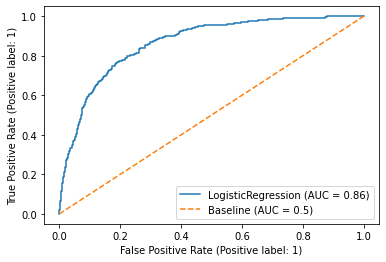

In [35]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

#Precisión, Sensibilidad, Especificidad

In [37]:
# Precision 
score = logreg.score(X_test, y_test)
print(score)

0.8820928518791452


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 3)
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)

In [47]:
# ignorar por ahora
score = logreg.score(X_test, y_test)
print(score)

0.8947833775419982


In [48]:
# valores reales que un algoritmo debería haber predicho
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
cm = metrics.confusion_matrix(y_test, predictions)


In [54]:
cm

array([[985,  19],
       [100,  27]])

In [55]:
cm.shape

(2, 2)

In [56]:
# flatten array
cm.ravel()

array([985,  19, 100,  27])

In [57]:
# unpacking
tn, fp, fn, tp = cm.ravel()

In [58]:
tn

985

In [59]:
fp

19

In [60]:
fn

100

In [61]:
tp

27

In [65]:
# Calcular sensibilidad, especificidad
precision= (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp/ (tp + fn)
specificity = tn / (tn + fp)
print('Precision: {:.3f}'.format(precision))
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))

Precision: 0.895
Sensitivity: 0.213
Specificity: 0.981


# Mapa de China

In [ ]:
import folium as fl
mapa=fl.Map(location=[35.86166, 104.195397],zoom_start=10)
mapa